# Agrupamento de cidades

O objetivo deste notebook é trabalhar com o agrupamento de cidades brasileiras por variáveis relacionadas à população, desenvolvimento econômico e urbanização. O intuito desta análise será encontrar cidades similares, totalizando no máximo 5 candidatos.

## Fonte de dados

O conjunto de dados utilizado é o *Brazilian Cities* (https://www.kaggle.com/crisparada/brazilian-cities), uma coletânea de Cristiana Parada utilizando dados abertos de fontes diversas (pesquisas do IBGE, dados da CET, Uber, etc).

In [ ]:
import pandas as pd
cidades_raw = pd.read_csv('https://raw.githubusercontent.com/laiscarraro/cidades-do-brasil/main/BRAZIL_CITIES.csv', sep=';')
cidades_raw

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,...,GDP_CAPITA,GVA_MAIN,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,69.0,318.0,438.0,517.0,3542.0,416.0,319.0,1843.0,1689.0,0.708,0.687,0.830,0.622,-49.440548,-16.758812,893.60,360.0,842.0,147.26,NaN,NaN,8583.0,Urbano,6.20,27991.25,74750.32,36915.04,145857.60,20554.20,166.41,...,20664.57,Demais serviços,28227691.0,284.0,5.0,1.0,56.0,0.0,2.0,29.0,110.0,26.0,4.0,5.0,0.0,2.0,10.0,12.0,4.0,6.0,6.0,1.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2158.0,1246.0,0.0,NaN,NaN,NaN,1.0
1,Abadia Dos Dourados,MG,0,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,38.0,207.0,260.0,351.0,2709.0,589.0,4479.0,18017.0,2207.0,0.690,0.693,0.839,0.563,-47.396832,-18.487565,753.12,77.0,296.0,881.06,Caminhos Do Cerrado,D,6972.0,Rural Adjacente,50524.57,25917.70,62689.23,28083.79,167215.28,12873.50,180.09,...,25591.70,Demais serviços,17909274.0,476.0,6.0,6.0,30.0,1.0,2.0,34.0,190.0,70.0,28.0,11.0,0.0,4.0,15.0,29.0,2.0,9.0,14.0,6.0,19.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2227.0,1142.0,0.0,NaN,NaN,NaN,1.0
2,Abadiânia,GO,0,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,139.0,650.0,894.0,1087.0,6896.0,990.0,10307.0,33085.0,2202.0,0.690,0.671,0.841,0.579,-48.718812,-16.182672,1017.55,227.0,720.0,"1,045.13",Região Turística Do Ouro E Cristais,C,19614.0,Rural Adjacente,42.84,16728.30,138198.58,63396.20,261161.91,26822.58,287984.49,...,15628.40,Demais serviços,37513019.0,288.0,5.0,9.0,26.0,0.0,2.0,7.0,117.0,12.0,57.0,2.0,1.0,0.0,7.0,15.0,3.0,11.0,5.0,1.0,8.0,0.0,0.0,1.0,34.0,1.0,1.0,1.0,1.0,33724584.0,67091904.0,2838.0,1426.0,0.0,NaN,NaN,NaN,3.0
3,Abaeté,MG,0,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,176.0,856.0,1233.0,1539.0,11979.0,2681.0,1862.0,7502.0,1994.0,0.698,0.720,0.848,0.556,-45.446191,-19.155848,644.74,1230.0,1716.0,"1,817.07",Lago De Três Marias,D,23223.0,Urbano,113824.60,31002.62,172.33,86081.41,403241.27,26994.09,430235.36,...,18250.42,Demais serviços,NaN,621.0,18.0,1.0,40.0,0.0,1.0,20.0,303.0,62.0,30.0,9.0,6.0,4.0,28.0,27.0,2.0,15.0,19.0,9.0,27.0,0.0,0.0,NaN,NaN,2.0,2.0,2.0,2.0,44974716.0,371922572.0,6928.0,2953.0,0.0,NaN,NaN,NaN,4.0
4,Abaetetuba,PA,0,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,1354.0,5567.0,7618.0,8905.0,53516.0,5996.0,25200.0,700872.0,3530.0,0.628,0.579,0.798,0.537,-48.884404,-1.723470,10.12,3389.0,1218.0,"1,610.65",Araguaia-Tocantins,D,156292.0,Urbano,140463.72,58610.00,468128.69,486872.40,1154074.81,95180.48,1249255.29,...,8222.36,"Administração, defesa, educação e saúde públic...",NaN,931.0,4.0,2.0,43.0,0.0,1.0,27.0,500.0,16.0,31.0,6.0,1.0,1.0,22.0,16.0,2.0,155.0,33.0,15.0,56.0,0.0,0.0,NaN,NaN,2.0,4.0,2.0,4.0,76181384.0,800078483.0,5277.0,25661.0,0.0,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5568,Xique-Xique,BA,0,45536.0,45536.0,0.0,11637.0,8461.0,3176.0,32497.0,518.0,2318.0,3095.0,3620.0,19371.0,3575.0,1601.0,3395.0,4533.0,0.585,0.563,0.741,0.479,-42.725508,-10.824974,406.26,169.0,1267.0,"5,079.66",Chapada Diamantina,D,46440.0,Urbano,51354.68,13458.07,1173

## Seleção de colunas

O conjunto de dados possui 5573 linhas, que é o número de cidades existentes no Brasil, e 81 colunas. Abaixo, vemos o nome de cada uma delas. A definição de cada coluna pode ser encontrada em Data_Dictionary (no mesmo repositório que o conjunto de dados utilizado).

In [ ]:
cidades_raw.columns

Index(['CITY', 'STATE', 'CAPITAL', 'IBGE_RES_POP', 'IBGE_RES_POP_BRAS',
       'IBGE_RES_POP_ESTR', 'IBGE_DU', 'IBGE_DU_URBAN', 'IBGE_DU_RURAL',
       'IBGE_POP', 'IBGE_1', 'IBGE_1-4', 'IBGE_5-9', 'IBGE_10-14',
       'IBGE_15-59', 'IBGE_60+', 'IBGE_PLANTED_AREA', 'IBGE_CROP_PRODUCTION_$',
       'IDHM Ranking 2010', 'IDHM', 'IDHM_Renda', 'IDHM_Longevidade',
       'IDHM_Educacao', 'LONG', 'LAT', 'ALT', 'PAY_TV', 'FIXED_PHONES', 'AREA',
       'REGIAO_TUR', 'CATEGORIA_TUR', 'ESTIMATED_POP', 'RURAL_URBAN',
       'GVA_AGROPEC', 'GVA_INDUSTRY', 'GVA_SERVICES', 'GVA_PUBLIC',
       ' GVA_TOTAL ', 'TAXES', 'GDP', 'POP_GDP', 'GDP_CAPITA', 'GVA_MAIN',
       'MUN_EXPENDIT', 'COMP_TOT', 'COMP_A', 'COMP_B', 'COMP_C', 'COMP_D',
       'COMP_E', 'COMP_F', 'COMP_G', 'COMP_H', 'COMP_I', 'COMP_J', 'COMP_K',
       'COMP_L', 'COMP_M', 'COMP_N', 'COMP_O', 'COMP_P', 'COMP_Q', 'COMP_R',
       'COMP_S', 'COMP_T', 'COMP_U', 'HOTELS', 'BEDS', 'Pr_Agencies',
       'Pu_Agencies', 'Pr_Bank', 'Pu_Bank', 'P

Vamos selecionar apenas as colunas que possuem relação com o tema estudado:

- **STATE**: nome do estado
- **IBGE_RES_POP**: população do último censo (2010)
- **ESTIMATED_POP**: população estimada pelo IBGE (2018)
- **IBGE_DU**: número de unidades domésticas (moradias)
- **IBGE_PLANTED_AREA**: área cultivada
- **AREA**: área total
- **Cars**: número de veículos
- **Wheeled_tractor**: número de tratores
- **IDHM**: IDH só que com M
- **LONG**, LAT: Longitude e latitude

In [ ]:
cols = ['STATE', 'IBGE_RES_POP', 'ESTIMATED_POP', 'IBGE_DU', 'IBGE_PLANTED_AREA', 'AREA', 'Cars', 'Wheeled_tractor', 'IDHM', 'LONG', 'LAT']

cidades = pd.DataFrame()
cidades['chave'] = cidades_raw['STATE'] + cidades_raw['CITY']
cidades[cols] = cidades_raw[cols]
cidades = cidades.sort_values(by='chave')
cidades

,chave,STATE,IBGE_RES_POP,ESTIMATED_POP,IBGE_DU,IBGE_PLANTED_AREA,AREA,Cars,Wheeled_tractor,IDHM,LONG,LAT
26,ACAcrelândia,AC,12538.0,15020.0,3473.0,5807.0,"1,807.95",1223.0,0.0,0.604,-67.052317,-10.073794
410,ACAssis Brasil,AC,6072.0,7300.0,1458.0,2166.0,"4,974.18",290.0,0.0,0.588,-69.563459,-10.942866
753,ACBrasiléia,AC,21398.0,25848.0,5973.0,3830.0,"3,916.50",2122.0,0.0,0.614,-68.747943,-11.016411
796,ACBujari,AC,8471.0,10111.0,2332.0,4654.0,"3,034.87",577.0,0.0,0.589,-67.951859,-9.820020
1082,ACCapixaba,AC,8798.0,11456.0,2361.0,6366.0,"1,701.97",561.0,0.0,0.575,-67.673508,-10.569768
...,...,...,...,...,...,...,...,...,...,...,...,...
5252,TOTocantínia,TO,6736.0,7471.0,1136.0,3868.0,"2,601.60",329.0,0.0,0.589,-48.375880,-9.558148
5333,TOTupirama,TO,1574.0,1860.0,478.0,12063.0,712.21,145.0,0.0,0.670,-48.206685,-8.980570
5334,TOTupiratins,TO,2097.0,2613.0,646.0,1922.0,895.31,98.0,0.0,0.590,-48.122996,-8.395530
5552,TOWanderlândia,TO,10981.0,11631.0,2916.0,3673.0,"1,373.06",589.0,0.0,0.638,-47.956268,-6.850126


## Criação de colunas

Algumas colunas nos fornecem informações que são mais ricas quando unidas entre si. Por exemplo: se olharmos apenas para a população total, podemos pensar que Manaus é uma cidade menor do que Belo Horizonte, pois a população de Belo Horizonte é maior. No entanto, olhando para a área, vemos que Manaus é bem maior do que Belo Horizonte geograficamente, e que a população está bem mais espalhada pelo território. Nesses casos, uma medida menos falaciosa que consegue balancear tanto o aspecto territorial quanto o aspecto populacional é a densidade demográfica, ou seja, o número de habitantes por metro quadrado.

In [ ]:
cidades[['chave', 'AREA', 'ESTIMATED_POP']].sort_values(by='ESTIMATED_POP', ascending=False)[5:7]

,chave,AREA,ESTIMATED_POP
592,MGBelo Horizonte,331.40,2501576.0
2886,AMManaus,"11,401.09",2145444.0


As colunas que criaremos são:

- densidade_demografica = ESTIMATED_POP/AREA
- densidade_moradias = IBGE_DU/AREA
- densidade_carros = Cars/AREA
- densidade_tratores = Wheeled_tractor/AREA
- perc_area_cultivada = IBGE_PLANTED_AREA/AREA
- crescimento = ESTIMATED_POP - IBGE_RES_POP

In [ ]:
def to_float(n): return float(''.join(str(n).split(',')))
cidades['AREA'] = cidades['AREA'].apply(to_float) # AREA era string por causa da vírgula; corrigindo.

cidades['densidade_demografica'] = cidades['ESTIMATED_POP']/cidades['AREA']
cidades['densidade_moradias'] = cidades['IBGE_DU']/cidades['AREA']
cidades['densidade_carros'] = cidades['Cars']/cidades['AREA']
cidades['densidade_tratores'] = cidades['Wheeled_tractor']/cidades['AREA']
cidades['perc_area_cultivada'] = cidades['IBGE_PLANTED_AREA']/cidades['AREA']
cidades['crescimento'] = cidades['ESTIMATED_POP'] - cidades['IBGE_RES_POP']

cidades

,chave,STATE,IBGE_RES_POP,ESTIMATED_POP,IBGE_DU,IBGE_PLANTED_AREA,AREA,Cars,Wheeled_tractor,IDHM,LONG,LAT,densidade_demografica,densidade_moradias,densidade_carros,densidade_tratores,perc_area_cultivada,crescimento
26,ACAcrelândia,AC,12538.0,15020.0,3473.0,5807.0,1807.95,1223.0,0.0,0.604,-67.052317,-10.073794,8.307752,1.920960,0.676457,0.0,3.211925,2482.0
410,ACAssis Brasil,AC,6072.0,7300.0,1458.0,2166.0,4974.18,290.0,0.0,0.588,-69.563459,-10.942866,1.467579,0.293114,0.058301,0.0,0.435449,1228.0
753,ACBrasiléia,AC,21398.0,25848.0,5973.0,3830.0,3916.50,2122.0,0.0,0.614,-68.747943,-11.016411,6.599770,1.525086,0.541810,0.0,0.977914,4450.0
796,ACBujari,AC,8471.0,10111.0,2332.0,4654.0,3034.87,577.0,0.0,0.589,-67.951859,-9.820020,3.331609,0.768402,0.190123,0.0,1.533509,1640.0
1082,ACCapixaba,AC,8798.0,11456.0,2361.0,6366.0,1701.97,561.0,0.0,0.575,-67.673508,-10.569768,6.731023,1.387216,0.329618,0.0,3.740371,2658.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5252,TOTocantínia,TO,6736.0,7471.0,1136.0,3868.0,2601.60,329.0,0.0,0.589,-48.375880,-9.558148,2.871694,0.436654,0.126461,0.0,1.486777,735.0
5333,TOTupirama,TO,1574.0,1860.0,478.0,12063.0,712.21,145.0,0.0,0.670,-48.206685,-8.980570,2.611589,0.671150,0.203592,0.0,16.937420,286.0
5334,TOTupiratins,TO,2097.0,2613.0,646.0,1922.0,895.31,98.0,0.0,0.590,-48.122996,-8.395530,2.918542,0.721538,0.109459,0.0,2.146742,516.0
5552,TOWanderlândia,TO,10981.0,11631.0,2916.0,3673.0,1373.06,589.0,0.0,0.638,-47.956268,-6.850126,8.470861,2.123724,0.428969,0.0,2.675047,650.0


## Preparação dos dados

Uma das primeiras preocupações é conferir o número de nulos. Outra possível preocupação é o número de valores iguais a zero, para o caso das variáveis discretas como número de carros ou número de tratores. Vemos essas duas porcentagens na tabela abaixo.

In [ ]:
vazios = pd.DataFrame([[0]*len(cidades.columns), [0]*len(cidades.columns)]).transpose()
vazios.columns = ['preenchimento', 'zeros']
vazios.index = cidades.columns

for c in cidades.columns:
  vazios.loc[c, 'preenchimento'] = round(len(cidades[c].dropna())/len(cidades[c]), 3)
  vazios.loc[c, 'zeros'] = round(sum([1 for i in cidades[c] if i == 0])/len(cidades[c]), 3)
vazios

,preenchimento,zeros
chave,1.000,0.000
STATE,1.000,0.000
IBGE_RES_POP,0.999,0.000
ESTIMATED_POP,0.999,0.000
IBGE_DU,0.998,0.000
IBGE_PLANTED_AREA,0.999,0.012
AREA,0.999,0.000
Cars,0.998,0.000
Wheeled_tractor,0.998,0.654
IDHM,0.999,0.000


Mais da metade dos exemplos é igual a zero nas variáveis relacionadas à contagem de tratores. Por isso, é possível que acabemos descartando essa variável antes de realizar a clusterização, e possivelmente vamos manter apenas a variável relacionada a contagem de carros.

Outra preocupação muito importante para algoritmos de agrupamento é a correlação/informação mútua entre as variáveis consideradas no modelo. Por exemplo: temos a variável de densidade demográfica, que é uma combinação da variável de área e de população estimada. 

Se aplicarmos um algoritmo de clusterização nas variáveis de densidade demográfica, IDHM e área, estaremos inconscientemente dando um peso maior à área, pois ela está presente tanto em sua forma "pura", na variável de mesmo nome, quanto na forma combinada com a população, na densidade demográfica. A redundância da informação, nesse tipo de problema, vai acabar atribuindo à informação repetida uma importância maior, que nem sempre faz jus à realidade.

Abaixo, vemos a matriz de correlação linear para o conjunto de dados em questão.

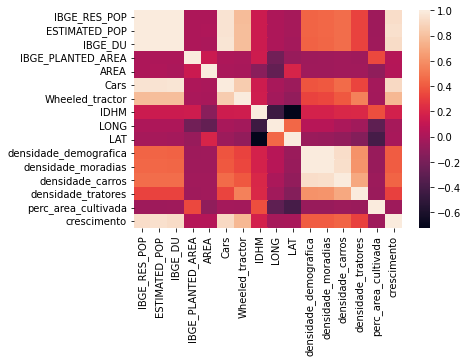

In [ ]:
import seaborn as sns
sns.heatmap(cidades.corr())

Apesar de não ser a única métrica de informação mútua, a correlação de pearson é um bom indicativo inicial de informações redundantes no conjunto de dados. Algumas das correlações óbvias são:

- IBGE_RES_POP, ESTIMATED_POP, IBGE_DU, crescimento e carros
- densidade_demografica, densidade_moradias, densidade_carros (todas contêm a área e outra variável correlacionada com a área)

Outra correlação menos óbvia, mas que faz sentido: LONG/LAT e IDH (quanto mais para o sul, menor a latitude e maior o IDHM).

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


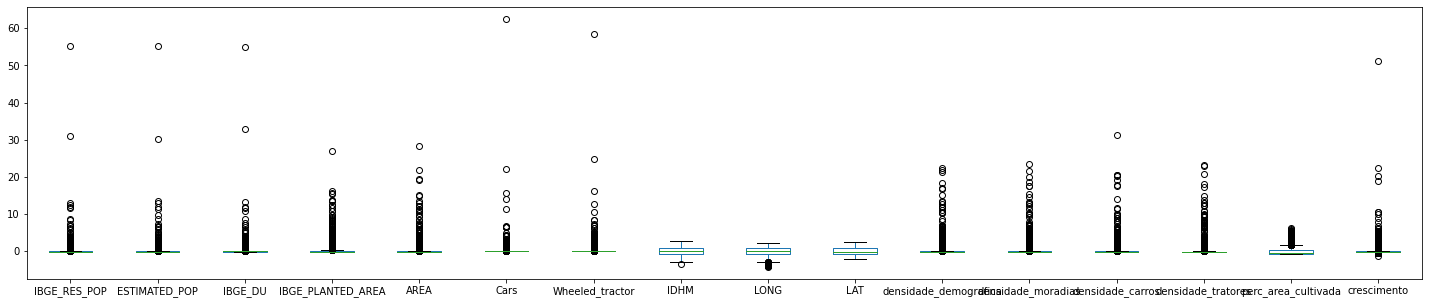

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_cols = [c for c in cidades.columns if c not in ['chave', 'STATE']]
cidades_sc = pd.DataFrame(sc.fit_transform(cidades[num_cols]), columns=num_cols)
b = cidades_sc.plot.box(figsize=(25, 5))

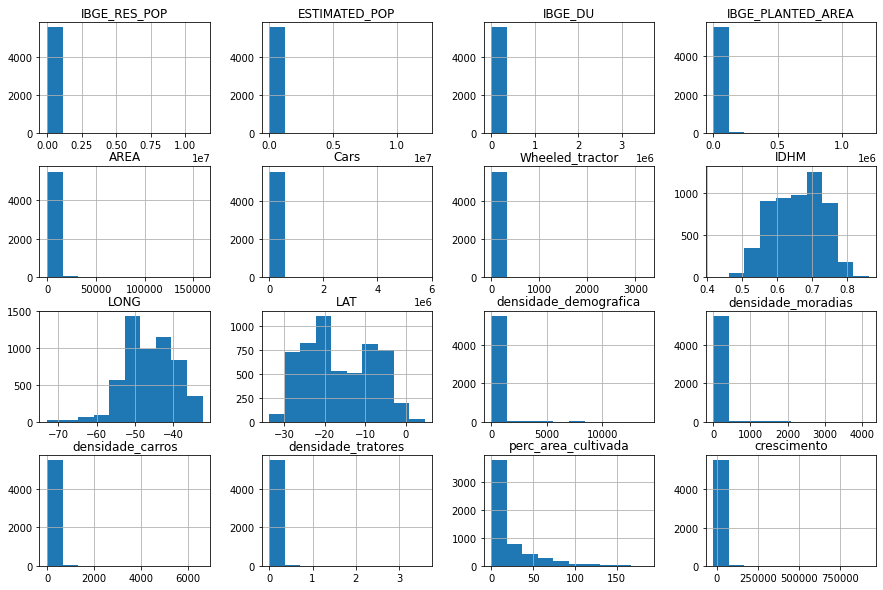

In [ ]:
import numpy as np

h = cidades.hist(figsize=(15,10))